In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('twentyeleven.csv').drop_duplicates(ignore_index=True).dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367058 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      367058 non-null  float64
 1   StockCode    367058 non-null  object 
 2   Description  367058 non-null  object 
 3   Quantity     367058 non-null  int64  
 4   InvoiceDate  367058 non-null  object 
 5   Price        367058 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      367058 non-null  object 
 8   date         367058 non-null  object 
 9   revenue      367058 non-null  float64
 10  year         367058 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 33.6+ MB


In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00+00:00,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00+00:00,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00+00:00,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [5]:
df['InvoiceDate'].dt.isocalendar().week

0          1
1          1
2          1
3          1
4          1
          ..
484325    49
484326    49
484327    49
484328    49
484329    49
Name: week, Length: 367058, dtype: UInt32

In [6]:
df['InvoiceDate'].dt.weekday

0         1
1         1
2         1
3         1
4         1
         ..
484325    4
484326    4
484327    4
484328    4
484329    4
Name: InvoiceDate, Length: 367058, dtype: int32

In [7]:
df['InvoiceDate'].dt.month

0          1
1          1
2          1
3          1
4          1
          ..
484325    12
484326    12
484327    12
484328    12
484329    12
Name: InvoiceDate, Length: 367058, dtype: int32

In [8]:
df['InvoiceDate'].dt.year

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
484325    2011
484326    2011
484327    2011
484328    2011
484329    2011
Name: InvoiceDate, Length: 367058, dtype: int32

In [9]:
df['month-year'] = df['InvoiceDate'].dt.strftime('%B-%Y')
df['month-year']

0          January-2011
1          January-2011
2          January-2011
3          January-2011
4          January-2011
              ...      
484325    December-2011
484326    December-2011
484327    December-2011
484328    December-2011
484329    December-2011
Name: month-year, Length: 367058, dtype: object

In [10]:
df['date'] = df['InvoiceDate'].dt.strftime('%d-%m-%Y')
df['date']

0         04-01-2011
1         04-01-2011
2         04-01-2011
3         04-01-2011
4         04-01-2011
             ...    
484325    09-12-2011
484326    09-12-2011
484327    09-12-2011
484328    09-12-2011
484329    09-12-2011
Name: date, Length: 367058, dtype: object

In [11]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df['date'].info()

<class 'pandas.core.series.Series'>
Index: 367058 entries, 0 to 484329
Series name: date
Non-Null Count   Dtype         
--------------   -----         
367058 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.6 MB


In [12]:
max_date = df['date'].max()
max_date

Timestamp('2011-12-09 00:00:00')

In [13]:
df_grouped = df.groupby(by = 'Customer ID').agg(last_purchase_date = ('date','max'))

In [14]:
df_grouped['recency'] = max_date - df_grouped['last_purchase_date']
df_grouped['recency'] = df_grouped['recency'].astype('str')
df_grouped['recency'] = df_grouped['recency'].str.replace(' days','').astype('int')

(array([1787.,  766.,  434.,  235.,  188.,  199.,  160.,  186.,  138.,
         126.]),
 array([  0. ,  33.9,  67.8, 101.7, 135.6, 169.5, 203.4, 237.3, 271.2,
        305.1, 339. ]),
 <BarContainer object of 10 artists>)

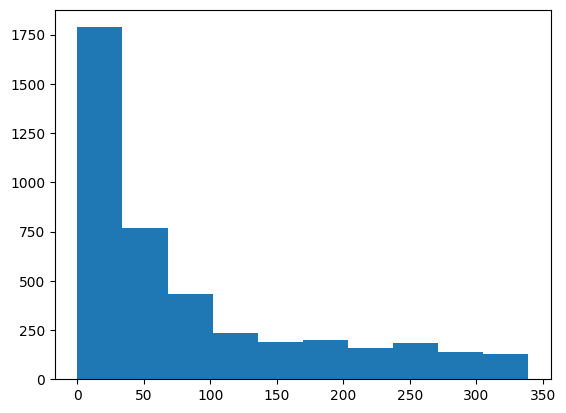

In [15]:
plt.hist(df_grouped['recency'])

In [16]:
sales_per_day = df.groupby(by = 'date', axis = 0, as_index = True).agg(daily_sales = ('Quantity','sum'))
sales_per_day

C:\Users\thanh\AppData\Local\Temp\ipykernel_15636\247135740.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  sales_per_day = df.groupby(by = 'date', axis = 0, as_index = True).agg(daily_sales = ('Quantity','sum'))


,daily_sales
date,
2011-01-04,6950
2011-01-05,18369
2011-01-06,21582
2011-01-07,15122
2011-01-09,8125
...,...
2011-12-05,38347
2011-12-06,27736
2011-12-07,41011


<Axes: xlabel='date'>

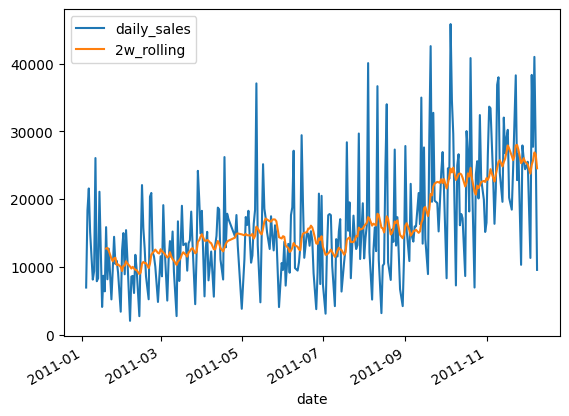

In [17]:
sales_per_day['2w_rolling'] = sales_per_day['daily_sales'].rolling(window = 14).mean()
sales_per_day.plot()

<Axes: xlabel='date'>

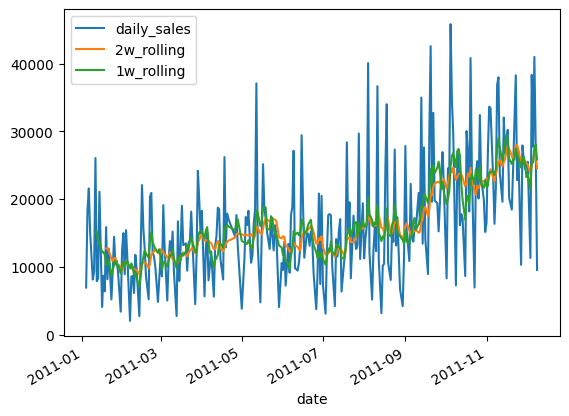

In [18]:
sales_per_day['1w_rolling'] = sales_per_day['daily_sales'].rolling(window = 7).mean()
sales_per_day.plot()

C:\Users\thanh\AppData\Local\Temp\ipykernel_15636\1213262216.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_per_day.resample('M').sum().plot()


<Axes: xlabel='date'>

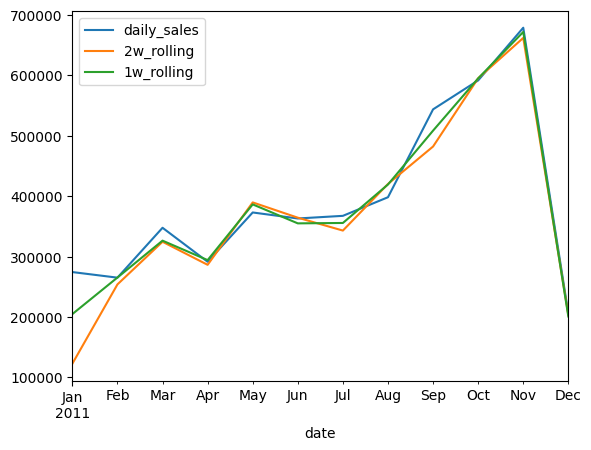

In [19]:
sales_per_day.resample('M').sum().plot()